In [38]:
from simphony_osp.namespaces import city, boe
from simphony_osp.tools import pretty_print
from rdflib import Graph, URIRef, Literal
from rdflib.namespace import FOAF
from simphony_osp.tools import export_file, import_file, search
from simphony_osp.session import core_session


In [4]:

freiburg = city.City(name="Freiburg", coordinates=[47.997791, 7.842609])

neighborhoods = {
    city.Neighborhood(name=name, coordinates=coordinates)
    for name, coordinates in [
        ('Altstadt', [47.99525, 7.84726]),
        ('Stühlinger', [47.99888, 7.83774]),
        ('Neuburg', [48.00021, 7.86084]),
        ('Herdern', [48.00779, 7.86268]),
        ('Brühl', [48.01684, 7.843]),
    ]
}

citizen_1 = city.Citizen(name='Nikola', age=35)
citizen_2 = city.Citizen(name='Lena', age=70)

freiburg[city.hasPart] |= neighborhoods
freiburg[city.hasInhabitant] += citizen_1, citizen_2

In [5]:
freiburg

<OntologyIndividual: b2f3ea0c-3d84-4ca8-8a33-e895ca3353bf>

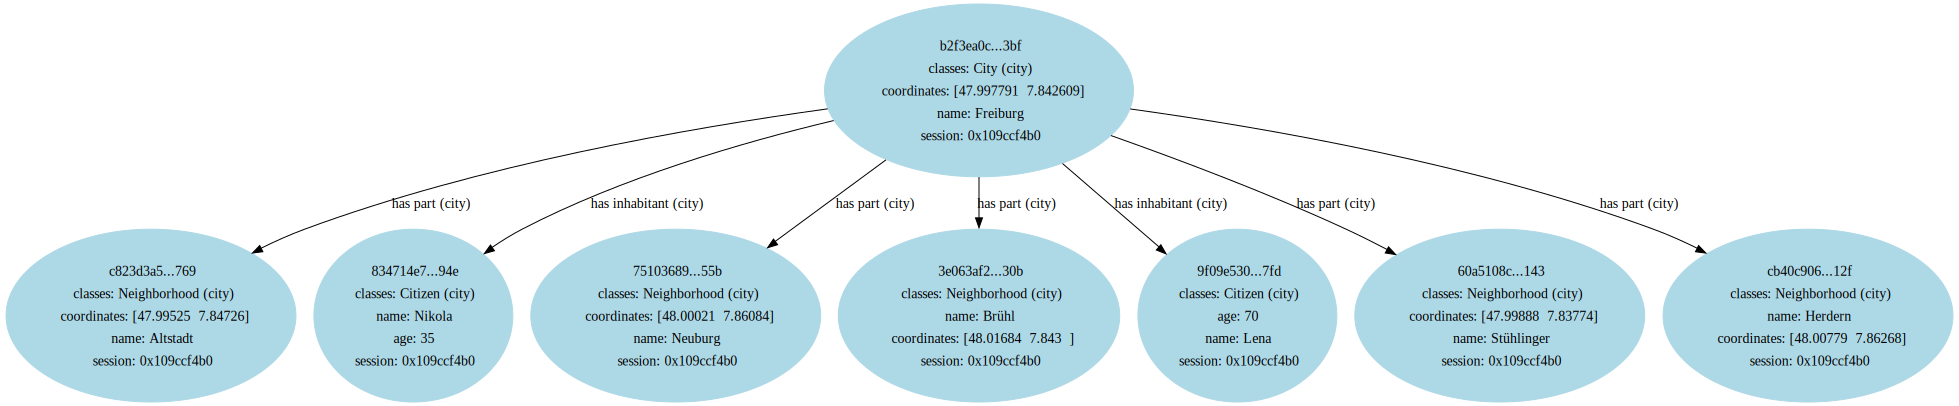

In [6]:
from simphony_osp.tools import semantic2dot  # explained in a later section

semantic2dot(freiburg, *neighborhoods, citizen_1, citizen_2)

In [7]:
from simphony_osp.session import Session

session = Session()

In [8]:
freiburg_copy = session.add(freiburg)
list(session), freiburg_copy.name, freiburg_copy.coordinates, freiburg_copy.get()

([<OntologyIndividual: b2f3ea0c-3d84-4ca8-8a33-e895ca3353bf>],
 'Freiburg',
 <simphony_osp.utils.datatypes.Vector: array([47.997791, 7.842609])>,
 set() <http://www.w3.org/2002/07/owl#topObjectProperty of ontology individual b2f3ea0c-3d84-4ca8-8a33-e895ca3353bf>)

In [9]:
list(session)

[<OntologyIndividual: b2f3ea0c-3d84-4ca8-8a33-e895ca3353bf>]

In [10]:
freiburg


<OntologyIndividual: b2f3ea0c-3d84-4ca8-8a33-e895ca3353bf>

In [11]:
session.add(citizen_1, citizen_2)

[<OntologyIndividual: 834714e7-350c-41a1-beea-11667895594e>,
 <OntologyIndividual: 9f09e530-27fa-4e6a-87c2-1a483fdba7fd>]

In [12]:
list(session)

[<OntologyIndividual: b2f3ea0c-3d84-4ca8-8a33-e895ca3353bf>,
 <OntologyIndividual: 834714e7-350c-41a1-beea-11667895594e>,
 <OntologyIndividual: 9f09e530-27fa-4e6a-87c2-1a483fdba7fd>]

In [13]:
neighborhoods


{<OntologyIndividual: 3e063af2-9d82-411e-b54d-a471da7f030b>,
 <OntologyIndividual: 60a5108c-624f-40fc-88e6-0d83d5c86143>,
 <OntologyIndividual: 75103689-9c58-4886-ba16-28e423a5e55b>,
 <OntologyIndividual: c823d3a5-f852-46d1-a0a9-4fcbc3ee1769>,
 <OntologyIndividual: cb40c906-b731-4862-b6a2-c55cba97712f>}

In [14]:
session.clear()


In [15]:
copies = session.add(freiburg, neighborhoods)

In [16]:
copies



[<OntologyIndividual: b2f3ea0c-3d84-4ca8-8a33-e895ca3353bf>,
 <OntologyIndividual: c823d3a5-f852-46d1-a0a9-4fcbc3ee1769>,
 <OntologyIndividual: 75103689-9c58-4886-ba16-28e423a5e55b>,
 <OntologyIndividual: 3e063af2-9d82-411e-b54d-a471da7f030b>,
 <OntologyIndividual: 60a5108c-624f-40fc-88e6-0d83d5c86143>,
 <OntologyIndividual: cb40c906-b731-4862-b6a2-c55cba97712f>]

In [23]:
pretty_print(copies[0])

- Ontology individual:
  identifier: b2f3ea0c-3d84-4ca8-8a33-e895ca3353bf
  type: City (city)
  superclasses: Geographical Place (city), None (owl), City (city), Populated Place (city)
  values:  coordinates: [47.997791  7.842609]
           name: Freiburg
   |_Relationship has part (city):
     - Ontology individual of class Neighborhood
      . identifier: 3e063af2-9d82-411e-b54d-a471da7f030b
      .  coordinates: [48.01684  7.843  ]
      .  name: Brühl
     - Ontology individual of class Neighborhood
      . identifier: 60a5108c-624f-40fc-88e6-0d83d5c86143
      .  coordinates: [47.99888  7.83774]
      .  name: Stühlinger
     - Ontology individual of class Neighborhood
      . identifier: 75103689-9c58-4886-ba16-28e423a5e55b
      .  coordinates: [48.00021  7.86084]
      .  name: Neuburg
     - Ontology individual of class Neighborhood
      . identifier: c823d3a5-f852-46d1-a0a9-4fcbc3ee1769
      .  coordinates: [47.99525  7.84726]
      .  name: Altstadt
     - Ontology indivi

In [24]:
for i in session:
    pretty_print(i)

- Ontology individual:
  identifier: b2f3ea0c-3d84-4ca8-8a33-e895ca3353bf
  type: City (city)
  superclasses: Geographical Place (city), None (owl), City (city), Populated Place (city)
  values:  coordinates: [47.997791  7.842609]
           name: Freiburg
   |_Relationship has part (city):
     - Ontology individual of class Neighborhood
      . identifier: 3e063af2-9d82-411e-b54d-a471da7f030b
      .  coordinates: [48.01684  7.843  ]
      .  name: Brühl
     - Ontology individual of class Neighborhood
      . identifier: 60a5108c-624f-40fc-88e6-0d83d5c86143
      .  coordinates: [47.99888  7.83774]
      .  name: Stühlinger
     - Ontology individual of class Neighborhood
      . identifier: 75103689-9c58-4886-ba16-28e423a5e55b
      .  coordinates: [48.00021  7.86084]
      .  name: Neuburg
     - Ontology individual of class Neighborhood
      . identifier: c823d3a5-f852-46d1-a0a9-4fcbc3ee1769
      .  coordinates: [47.99525  7.84726]
      .  name: Altstadt
     - Ontology indivi

In [25]:
len(session)

6

In [27]:
str1=""

In [28]:
pretty_print(copies[0], file=str1)

AttributeError: 'str' object has no attribute 'write'

In [31]:
freiburg.name


'Freiburg'

In [36]:
s=export_file( individuals_or_session=session,main = None,format  = "application/ld+json",    all_triples= True, all_statements= True)

In [37]:
print(s)

[
  {
    "@id": "https://www.simphony-osp.eu/entity#75103689-9c58-4886-ba16-28e423a5e55b",
    "@type": [
      "https://www.simphony-osp.eu/city#Neighborhood"
    ],
    "https://www.simphony-osp.eu/city#coordinates": [
      {
        "@type": "https://www.simphony-osp.eu/types#Vector",
        "@value": "13YFp0RR93>yVq_1^`Gv#9Dj`fN>u{"
      }
    ],
    "https://www.simphony-osp.eu/city#name": [
      {
        "@value": "Neuburg"
      }
    ]
  },
  {
    "@id": "https://www.simphony-osp.eu/entity#60a5108c-624f-40fc-88e6-0d83d5c86143",
    "@type": [
      "https://www.simphony-osp.eu/city#Neighborhood"
    ],
    "https://www.simphony-osp.eu/city#coordinates": [
      {
        "@type": "https://www.simphony-osp.eu/types#Vector",
        "@value": "13YFp0RR93a!|rd+y6&EL^QgC*jXPy"
      }
    ],
    "https://www.simphony-osp.eu/city#name": [
      {
        "@value": "Stühlinger"
      }
    ]
  },
  {
    "@id": "https://www.simphony-osp.eu/entity#b2f3ea0c-3d84-4ca8-8a33-e895ca

In [39]:
list(core_session)

[<OntologyIndividual: b2f3ea0c-3d84-4ca8-8a33-e895ca3353bf>,
 <OntologyIndividual: c823d3a5-f852-46d1-a0a9-4fcbc3ee1769>,
 <OntologyIndividual: 60a5108c-624f-40fc-88e6-0d83d5c86143>,
 <OntologyIndividual: 75103689-9c58-4886-ba16-28e423a5e55b>,
 <OntologyIndividual: cb40c906-b731-4862-b6a2-c55cba97712f>,
 <OntologyIndividual: 3e063af2-9d82-411e-b54d-a471da7f030b>,
 <OntologyIndividual: 834714e7-350c-41a1-beea-11667895594e>,
 <OntologyIndividual: 9f09e530-27fa-4e6a-87c2-1a483fdba7fd>]

In [42]:
core_session.get(citizen_1 )

<OntologyIndividual: 834714e7-350c-41a1-beea-11667895594e>

In [47]:
from simphony_osp.namespaces import city, owl, rdfs
from simphony_osp.session import core_session

# Create a city called "Freiburg"
freiburg = city.City(name="Freiburg", coordinates=[47.997791, 7.842609])
freiburg_neighborhoods = [
    city.Neighborhood(name=name, coordinates=coordinates)
    for name, coordinates in [
        ('Altstadt', [47.99525, 7.84726]),
        ('Stühlinger', [47.99888, 7.83774]),
        ('Neuburg', [48.00021, 7.86084]),
        ('Herdern', [48.00779, 7.86268]),
        ('Brühl', [48.01684, 7.843]),
    ]
]
freiburg_citizens = {
    city.Citizen(name='Nikola', age=35,
                 iri="http://example.org/entities#Nikola"),
    city.Citizen(name='Lena', age=70,
                 iri="http://example.org/entities#Lena"),
}
freiburg[city.hasPart] |= freiburg_neighborhoods
freiburg[city.hasInhabitant] |= freiburg_citizens

# Create a city called "Paris"
paris = city.City(name="Paris", coordinates=[48.85333, 2.34885])
paris_neighborhoods = {
    city.Neighborhood(name=name, coordinates=coordinates)
    for name, coordinates in [
        ('Louvre', [48.86466, 2.33487]),
        ('Bourse', [48.86864, 2.34146]),
        ('Temple', [48.86101, 2.36037]),
        ('Hôtel-de-Ville', [48.85447, 2.35902]),
        ('Panthéon', [48.84466, 2.3471]),
    ]
}
paris_citizens = {
    city.Citizen(name='François', age=32)
}
paris[city.hasPart] |= paris_neighborhoods
paris[city.hasInhabitant] = paris_citizens

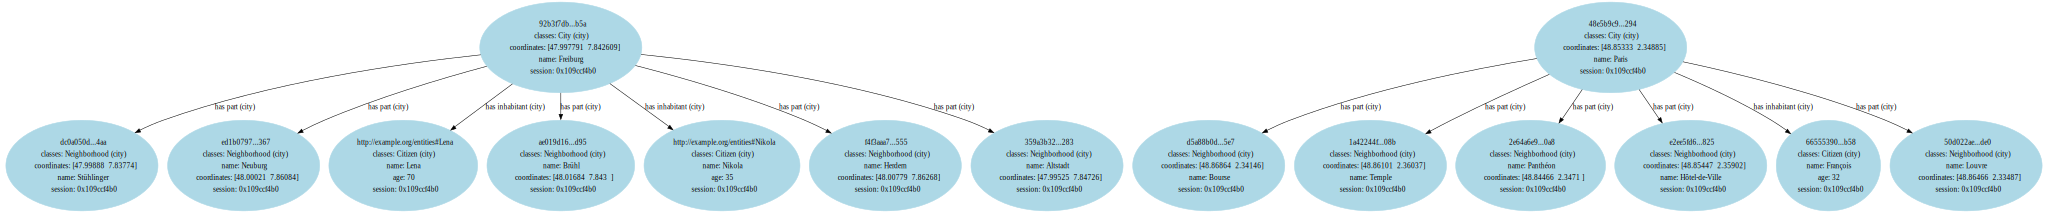

In [48]:
semantic2dot(freiburg, *freiburg_neighborhoods, *freiburg_citizens,
             paris, *paris_neighborhoods, *paris_citizens)

In [49]:

found = list(
    search.find(freiburg)
)

In [50]:
found


[<OntologyIndividual: 92b3f7db-4db9-4a11-baf7-f0c4db55fb5a>,
 <OntologyIndividual: dc0a050d-a3d9-4ed7-acd6-e9b8dbfde4aa>,
 <OntologyIndividual: ed1b0797-b790-43f9-b90d-291a2abfd367>,
 <OntologyIndividual: http://example.org/entities#Lena>,
 <OntologyIndividual: ae019d16-44e2-40df-ad30-600270148d95>,
 <OntologyIndividual: http://example.org/entities#Nikola>,
 <OntologyIndividual: f4f3aaa7-0224-49be-b162-1ea5a5f66555>,
 <OntologyIndividual: 359a3b32-f5ec-421f-88ab-6e4d6b8af283>]

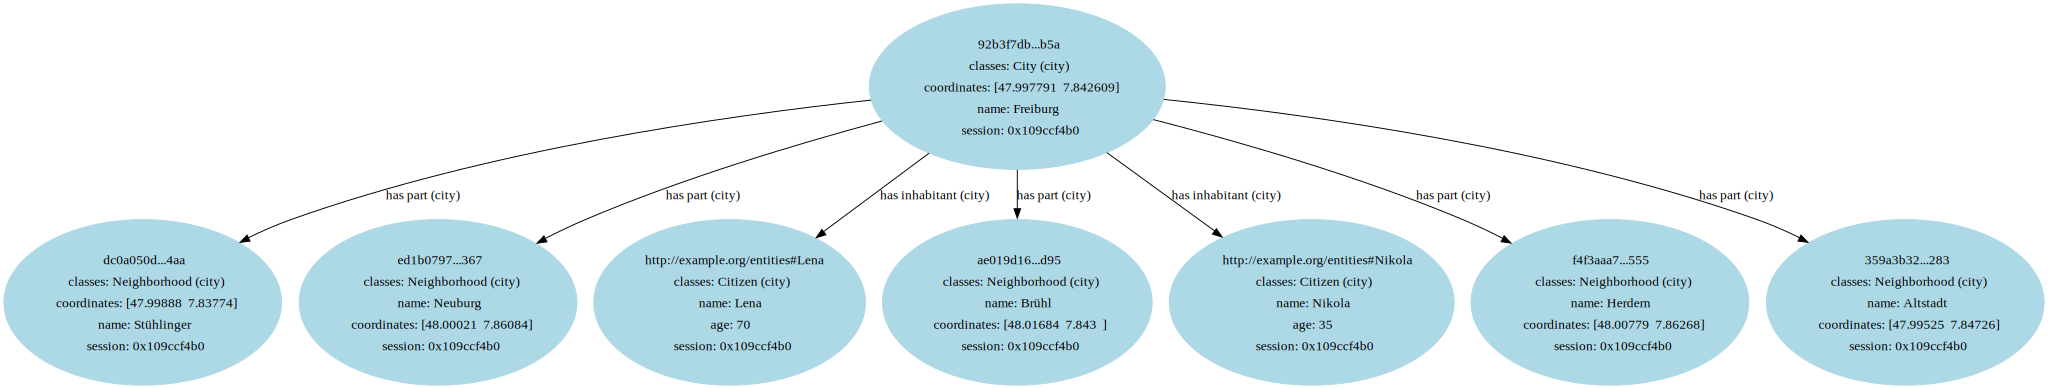

In [52]:
semantic2dot(*found)

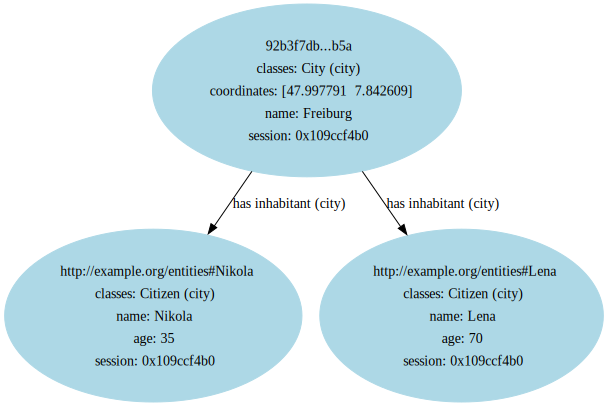

In [54]:
found = list(
    search.find(
        freiburg,
        rel=(city.hasInhabitant, city.hasWorker)  # if only one relationship has to be considered, just pass it directly (i.e. `rel=city.hasInhabitant`)
    )
)

semantic2dot(*found)

In [66]:
s=export_file( individuals_or_session=found,main = None,format  = "application/ld+json",    all_triples= True, all_statements= True)

In [67]:
print(s)    

[
  {
    "@id": "http://example.org/entities#Lena",
    "@type": [
      "https://www.simphony-osp.eu/city#Citizen"
    ],
    "https://www.simphony-osp.eu/city#age": [
      {
        "@value": 70
      }
    ],
    "https://www.simphony-osp.eu/city#name": [
      {
        "@value": "Lena"
      }
    ]
  },
  {
    "@id": "https://www.simphony-osp.eu/entity#92b3f7db-4db9-4a11-baf7-f0c4db55fb5a",
    "@type": [
      "https://www.simphony-osp.eu/city#City"
    ],
    "https://www.simphony-osp.eu/city#coordinates": [
      {
        "@type": "https://www.simphony-osp.eu/types#Vector",
        "@value": "13YFp0RR93AD@t&xBo{#)k4YS)LtJz"
      }
    ],
    "https://www.simphony-osp.eu/city#hasInhabitant": [
      {
        "@id": "http://example.org/entities#Nikola"
      },
      {
        "@id": "http://example.org/entities#Lena"
      }
    ],
    "https://www.simphony-osp.eu/city#hasPart": [
      {
        "@id": "https://www.simphony-osp.eu/entity#359a3b32-f5ec-421f-88ab-6e4d6b8af

In [70]:
result = search.sparql(  # no session specified, uses the default session (Core Session in this example)
    f"""SELECT ?o WHERE {{
        <{freiburg.identifier}> ?p ?o .
    }}
    """
)

print(
    len(result),  # number of rows in the result
    bool(result)  # True when at least one match has been found
)

for row in result:  # iterating the result yields ResultRow objects
    print(row.__repr__())
    # ResultRows inherint from tuples
    # the order of the variables passed to the query is respected

    print(row[0].__repr__())  # a specific variable can be accessed using either its position,
    print(row['o'].__repr__())  # or name

    print(row.get('unknown_variable', None))  # a dict-like `get` method is available

    print(row.asdict())  # transforms the row into a dictionary

10 True
(rdflib.term.Literal('13YFp0RR93AD@t&xBo{#)k4YS)LtJz', datatype=rdflib.term.URIRef('https://www.simphony-osp.eu/types#Vector')),)
rdflib.term.Literal('13YFp0RR93AD@t&xBo{#)k4YS)LtJz', datatype=rdflib.term.URIRef('https://www.simphony-osp.eu/types#Vector'))
rdflib.term.Literal('13YFp0RR93AD@t&xBo{#)k4YS)LtJz', datatype=rdflib.term.URIRef('https://www.simphony-osp.eu/types#Vector'))
None
{'o': rdflib.term.Literal('13YFp0RR93AD@t&xBo{#)k4YS)LtJz', datatype=rdflib.term.URIRef('https://www.simphony-osp.eu/types#Vector'))}
(rdflib.term.Literal('Freiburg', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
rdflib.term.Literal('Freiburg', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string'))
rdflib.term.Literal('Freiburg', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string'))
None
{'o': rdflib.term.Literal('Freiburg', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string'))}
(rdflib.term.URIRef('https://www.simph